In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

@interact
def sigmoid(w=widgets.FloatSlider(min=-50.0,max=50.0,step=1,value=1.0), 
         b=widgets.FloatSlider(min=-100.0,max=100.0,step=1.0,value=-0.0)):
    x = np.linspace(-10, 10, 200)
    z = x*w + b
    y = np.exp(z)/(np.exp(z)+1)

    plt.plot(x, y)
    plt.ylabel('Sigmoid(x)')
    plt.xlabel('x')
    plt.title('Sigmoid function.')
    return plt.figure()

interactive(children=(FloatSlider(value=1.0, description='w', max=50.0, min=-50.0, step=1.0), FloatSlider(valu…

In [ ]:
@interact
def sigm_comp(s1=widgets.FloatSlider(min=-3.0,max=3.0,step=0.1,value=1.),
              s2=widgets.FloatSlider(min=-3.0,max=3.0,step=0.1,value=1.),
              wo1=widgets.FloatSlider(min=-3.0,max=3.0,step=0.1,value=1.),
              wo2=widgets.FloatSlider(min=-3.0,max=3.0,step=0.1,value=2),
              h=widgets.FloatSlider(min=-10.0,max=10.0,step=0.1,value=1)):
  
    x = np.linspace(-2, 2, 400)
    
    w1 = w2 = 500
    b1 = -s1 * w1
    b2 = -s2 * w2
    z1 = x*w1 + b1
    y1 = np.exp(z1)/(np.exp(z1)+1)

    z2 = x*w2 + b2
    y2 = np.exp(z2)/(np.exp(z2)+1)

    yo = h*(wo1 * y1 + wo2 * y2)

    plt.plot(x, yo)
    plt.ylabel('Composite Sigmoid(x)')
    plt.xlabel('x')
    plt.title('Composite Sigmoid function.')
    return plt.figure()

interactive(children=(FloatSlider(value=1.0, description='s1', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

@interact
def relu(w=widgets.FloatSlider(min=-10.0,max=10.0,step=1,value=1.0), 
         b=widgets.FloatSlider(min=-10.0,max=10.0,step=1.0,value=-5.0)):
    x = np.linspace(-10, 10, 200)
    z = x*w + b
    y = np.maximum(0,z)

    plt.plot(x, y)
    plt.ylabel('ReLU(x)')
    plt.xlabel('x')
    plt.title('ReLu function.')
    return plt.figure()

interactive(children=(FloatSlider(value=1.0, description='w', max=10.0, min=-10.0, step=1.0), FloatSlider(valu…

In [ ]:
@interact
def relu_comp(w1=widgets.FloatSlider(min=-10.0,max=10.0,step=1.,value=5.),
              w2=widgets.FloatSlider(min=-10.0,max=10.0,step=1.,value=4.),
              w3=widgets.FloatSlider(min=-10.0,max=10.0,step=1.,value=3.),
              b1=widgets.FloatSlider(min=-10.0,max=10.0,step=1.,value=2.),
              b2=widgets.FloatSlider(min=-10.0,max=10.0,step=1.,value=1.),
              b3=widgets.FloatSlider(min=-10.0,max=10.0,step=1.,value=0.),
              wo1=widgets.FloatSlider(min=-3.0,max=3.0,step=0.1,value=1.),
              wo2=widgets.FloatSlider(min=-3.0,max=3.0,step=0.1,value=2),
              wo3=widgets.FloatSlider(min=-3.0,max=3.0,step=0.1,value=3.),
              h=widgets.FloatSlider(min=-1.0,max=1.0,step=0.1,value=1)):
  

    x = np.linspace(-2, 2, 400)
    
    z1 = x*w1 + b1
    y1 = np.maximum(0,z1)

    z2 = x*w2 + b2
    y2 = np.maximum(0,z2)

    z3 = x*w3 + b3
    y3 = np.maximum(0,z3)

    yo = h*(wo1 * y1 + wo2 * y2 + wo3*y3)

    plt.plot(x, yo)
    plt.ylabel('Composite ReLU(x)')
    plt.xlabel('x')
    plt.title('Composite ReLu function.')
    return plt.figure()

interactive(children=(FloatSlider(value=5.0, description='w1', max=10.0, min=-10.0, step=1.0), FloatSlider(val…

### Sigmoidal functions

**Definition 1.** A function $\sigma: \mathbb{R}\rightarrow [0,1]$ is called sigmoidal if
$$
\lim_{x\rightarrow -\infty}\sigma(x)=0, \qquad \lim_{x\rightarrow \infty}\sigma(x)=1.
$$

**Definition 2.** Let $n$ be a natural number. We say that an activation function $f:\mathbb{R} \rightarrow \mathbb{R}$ is $n$-discriminatory if the only signed Borel measure $\mu$ such that 
$$
\int f(y\cdot x+\theta)d\mu(x)=0, \quad \forall y\in\mathbb{R}^n, \theta\in \mathbb{R},
$$
is the zero measure.

**Definition 3.** We say an activation function $f:\mathbb{R} \rightarrow \mathbb{R}$ is discriminatory if it is $n$-discriminatory for any $n$.

**Remark 1.** A discriminatory function $\sigma$ is volumetrically non-destructive when it acts on linear transformations of input. 

### Universal approximation theorem

Let $x$ be the input variable, $z$ the target and denote the target function by $z=f(x)$, with $f$ in a certain function space $S$.
Some definitions:

* $I_n=[0,1]^n$;
* We say that the neural network is a *universal approximator* for the space $(S,d)$ if the space of outcomes $U$ is $d$-dense in $S$ *i.e.*
$$
\forall f \in S, \quad \forall \epsilon >0, \quad \exists g\in U : d(f-g)<\epsilon
$$
* let $K$ denote a compact set in $\mathbb{R}^n$ and denote by $C(K)$ the set of real-valued continuous function on $K$;
* $M(I_n)$ is the space of finite signed regular Borel measure on $I_n$. (*Note:* regular means that while different measures may define different sizes for a single set, they all ideally convey some idea of how much space that set takes up relative to the larger space in which it resides).

**Theorem (representation of linear bounded functional).** Let $F$ be a bounded linear functional on $C(K)$. Then there exists a unique finite sign Borel measure $\mu$ on $K$ such that 
$$
F(f)=\int_Kf(x)d\mu(x), \quad \forall f\in C(K).
$$ 
Moreover $\left\|F\right\|=|\mu|(K)$.

From the Hanh-Banach theorem we have the following two lemmas.

**Lemma 1.** Let $U$ be a linear subspace of a normed linear space $X$ and consider $x_0 \in X$ such that
$$
\operatorname{dist}\left(x_0, U\right) \geq \delta,
$$
for some $\delta>0$, i.e., 
$$\left\|x_0-u\right\| \geq \delta, \forall u \in U.
$$ Then there is a bounded linear functional $L$ on $X$ such that:

(i) $\|L\| \leq 1$

(ii) $L(u)=0, \quad \forall u \in U$, i.e., $L_{\mid U}=0$

(iii) $L\left(x_0\right)=\delta$.

**Lemma 2 (reformulation of Lemma 1).** Let $U$ be a linear, nondense subspace of a normed linear space $X$. Then there is a bounded linear functional $L$ on $X$ such that $L \neq 0$ on $X$ and $L_{U}=0$.

**Lemma 3.** Let $U$ be a linear, non-dense subspace of $C\left(I_n\right)$. Then there is a measure $\mu \in M\left(I_n\right)$ such that
$$
\int_{I_n} h d\mu=0, \quad \forall h \in U .
$$

*Proof:* Considering $X=C\left(I_n\right)$ in Lemma 2, there is a bounded linear functional $L: C\left(I_n\right) \rightarrow \mathbb{R}$ such that $L \neq 0$ on $C\left(I_n\right)$ and $L_{\mid U}=0$. Applying the representation theorem of linear bounded functionals on $C\left(I_n\right)$ there is a measure $\mu \in M\left(I_n\right)$ such that
$$
L(f)=\int_{I_n} f d \mu, \quad \forall f \in C\left(I_n\right).
$$

In particular for any $h\in U$ we have
$$
L(h)=\int_{I_n} h d \mu=0, 
$$
which is the desired result.

**Remark 2.** Note that $L\neq 0$ implies $\mu\neq 0$.

**Proposition.** Let $\sigma$ be any continuous discriminatory function. Then the finite sums of the form
$$
G(x)=\sum_{j=1}^N \alpha_j \sigma\left(w_j^T x+\theta_j\right)_1 \quad w_j \in \mathbb{R}^n, \alpha_j, \theta_j \in \mathbb{R}
$$
are dense in $C\left(I_n\right)$.

*Proof:* Since $\sigma$ is contimuous, it follows that
$$
U=\left\{G ; G(x)=\sum_{j=1}^N \alpha_j \sigma\left(w_j^T x+\theta_j\right)\right\} .
$$
is a linear subspace of $C\left(I_n\right)$. We continue the proof adopting the contradiction method.

Assume that $U$ is not dense in $C\left(I_n\right)$. By Lemma 3 there is $\mu \in M\left(I_n\right)$ such that
$$
\int_{I_n} h d \mu=0, \quad \forall h \in U
$$
This can also be written as
$$
\sum_{j=1}^N \alpha_j \int_{I_n} \sigma\left(w_j^T x+\theta_j\right) d \mu=0, \quad \forall w_j \in \mathbb{R}^n, \alpha_j, \theta_j \in \mathbb{R}
$$
By choosing convenient coefficients $\alpha_j$, we obtain
$$
\int_{I_n} \sigma\left(w^T x+\theta\right) d \mu=0, \quad \forall w \in \mathbb{R}^n, \theta \in \mathbb{R}
$$
Using that $\sigma$ is discriminatory, yields $\mu=0$, which is a contradiction (see Remark 2).

**Definition.**
Let 
* $P_{w,\theta}=\left\{x;w^Tx+\theta=0\right\}$ the hyperplane with normal vector $w$ and $(n+1)$-intercept $\theta$;
* $H^+_{w,\theta}=H_{w,\theta}=\left\{x;w^Tx+\theta>0\right\}$ the positive half-space;
* $H^-_{w,\theta}=\left\{x;w^Tx+\theta < 0\right\}$ the negative half-space.

**Lemma 4.** Let $\mu \in M(I_n)$. if $\mu$ vanishes on all hyperplanes and open half-spaces in $\mathbb{R}^n$ then $\mu$ is zero. More precisely if
$$
\mu(P_{w,\theta})=0, \quad \mu(H_{w,\theta})=0, \quad \forall w\in\mathbb{R}^n, \theta\in\mathbb{R},
$$
then $\mu=0$.

**Proposition.** Any continuous sigmoidal function is discriminatory for all measures $\mu \in M(I_n)$.

*Proof.* Let $\mu\in M(I_n)$ be a fixed measure. Choose a continuous sigmoidal function that satisfies
$$
\int_{I_n}\sigma(w^Tx+\theta)d\mu(x)=0, \quad \forall w\in\mathbb{R}^n, \theta\in\mathbb{R} \qquad (1).
$$

We need to show that $\mu=0$. First, construct the continuous function
$$
\sigma_{\lambda}(x)=\sigma\left(\lambda\left(w^T x+\theta\right)+\phi\right)
$$
for given $w, \theta$ and $\phi$, and use the definition of a sigmoidal to note that
$$
\lim_{\lambda \rightarrow \infty} \sigma_\lambda(x)=\left\{\begin{array}{ll}
1, & \text { if } w^T x+\theta>0 \\
0, & \text { if } w^T x+\theta<0 \\
\sigma(\phi), & \text { if } w^T x+\theta=0
\end{array} \right.
$$

Define the bounded function
$$
\gamma(x)=\left\{\begin{array}{ll}
1, & \text { if } x \in H_{w, \theta}^{+} \\
0, & \text { if } x \in H_{w, \theta}^{-} \\
\sigma(\phi), & \text { if } x \in P_{w, \theta}
\end{array}\right.
$$
and notice that $\sigma_\lambda(x) \rightarrow \gamma(x)$ pointwise on $\mathbb{R}$, as $\lambda \rightarrow \infty$. The Bounded Convergence Theorem allows switching the limit with the integral, obtaining
$$
\lim _{\lambda \rightarrow \infty} \int_{I_n} \sigma_{\lambda}(x) d \mu(x) =\int_{I_n} \gamma(x) d \mu(x) \\
=\int_{H_{w, \theta}^{+}} \gamma(x) d \mu(x)+\int_{H_{w, \theta}^{-}} \gamma(x) d \mu(x)+\int_{P_{w, \theta}} \gamma(x)d\mu(x) \\
=\mu\left(H_{w, \theta}^{+}\right)+\sigma(\phi) \mu\left(P_{w, \theta}\right) .
$$
Equation (1) implies that $\int_{I_n} \sigma_\lambda(x) d \mu(x)=0$, and hence the limit in previous left term vanishes. Consequently, the right term must also vanish, fact that can be written as
$$
\mu\left(H_{w, \theta}^{+}\right)+\sigma(\phi) \mu\left(P_{w, \theta}\right)=0. 
$$
Since this relation holds for any value of $\phi$, taking $\phi \rightarrow+\infty$ and using the  properties of $\sigma$, yields
$$
\mu\left(H_{w, \theta}^{+}\right)+\mu\left(P_{w, \theta}\right)=0 .
$$
Similarly, taking $\phi \rightarrow-\infty$, implies
$$
\mu\left(H_{w, \theta}^{+}\right)=0, \quad \forall w \in \mathbb{R}^n, \theta \in \mathbb{R}. \qquad (2)
$$
Note that, as a consequence of the last two relations, we also have $\mu(P_{w,\theta})=0$ . Since $H_{w, \theta}^{+}=H_{-w,-\theta}^{-}$, relation (2) states that the measure $\mu$ vanishes on all half-spaces of $\mathbb{R}^n$. Lemma 4 states that a measure with such properties is necessarily the zero measure, $\mu=0$. Therefore, $\sigma$ is discriminatory.

**Proposition.** The ReLU function is 1-discriminatory.

*Proof.* Let $\mu$ be a signed Borel measure, and assume the following holds for all $y \in \mathbb{R}$ and $\theta \in \mathbb{R}$ :
$$
\int ReLU(y x+\theta) d \mu(x)=0
$$
We want to show that $\mu=0$. For that, we will construcasa sigmoid bounded, continuous (and therefore Borel measurable) function from subtracting two ReLU functions with different parameters. In particular, consider the function
$$
f(x)=\left\{\begin{array}{ll}
0 & \text { if } x<0 \\
x & \text { if } x \in[0,1] \\
1 & \text { if } x>1
\end{array}\right.
$$
Then any function of the form $g(x)=f(y x+\theta)$ with $y \neq 0$ can be described as
$$
g(x)=ReLU\left(y x+\theta_1\right)-ReLU\left(y x+\theta_2\right)
$$
by setting $\theta_1=-\theta / y$ and $\theta_2=(1-\theta) / y$. If $y=0$, then instead set
$$
g(x)=f(\theta)=\left\{\begin{array}{ll}
ReLU(f(\theta)) & \text { if } f(\theta) \geq 0 \\
-ReLU(-f(\theta)) & \text { if } f(\theta) \leq 0
\end{array}\right.
$$
Which means that for any $y \in \mathbb{R}, \theta \in \mathbb{R}$
$$
\int f(y x+\theta) d \mu(x) =\int\left(ReLU\left(y x+\theta_1\right)-ReLU\left(y x+\theta_2\right)\right) d \mu(x) \\
=\int ReLU\left(y x+\theta_1\right) d \mu(x)-\int ReLU\left(y x+\theta_2\right) d \mu(x) \\
=0-0=0 .
$$
By the previous lemma, $f$ is discriminatory, and therefore, $\mu=0$.

**Definition.** For $f: \mathbb{R}\rightarrow \mathbb{R}$ an activation function we define:
$$
\Sigma_n(f)=span\left\{f(y\cdot x+ \theta)|y\in \mathbb{R}^n, \theta \in \mathbb{R}\right\}.
$$ 

**Proposition.** If $\Sigma_1(f)$ is dense in $C([0,1])$ then $\Sigma_n(f)$ is dense in $C([0,1]^n)$.

*Proof.* We use the fact that the span of the set $\left\{g(a \cdot x) \mid a \in \mathbb{R}^n, g \in C([0,1])\right\}$ is dense in $C\left([0,1]^n\right)$. That is, given any function $h \in C\left([0,1]^n\right)$ and $\epsilon>0$ there exist functions $g_k$ in $C([0,1])$ such that
$$
\left|h(x)-\Sigma_{k=1}^N g_k\left(a_k \cdot x\right)\right|<\epsilon / 2 .
$$
If we now examine each function $g_k\left(a_k \cdot x\right)$, and use the assumption that $\Sigma_1(f)$ is dense in $C([0,1])$, we conclude that for any such function, there exists a sum of functions such that
$$
\left|g_k\left(a_k \cdot x\right)-\Sigma_{i=1}^{N_k} f\left(y_{k, i} \cdot x+\theta_{k, i}\right)\right|<\varepsilon / 2 k .
$$
By applying the triangle inequality, we get that
$$
\begin{aligned}
\left|h(x)-\Sigma_{k=1}^N \Sigma_{i=1}^{N_k} f\left(y_{k, i} \cdot x+\theta_{k, i}\right)\right| & <\left|h(x)-\Sigma_{k=1}^N g_k\left(a_k \cdot x\right)\right|+k(\epsilon / 2 k) \\
& <\epsilon / 2+\epsilon / 2 \\
& =\epsilon .
\end{aligned}
$$
This shows we can get arbitrarily close to any function in $C\left([0,1]^n\right)$ by using functions in $\Sigma_n(f)$.

## Complexity of NN

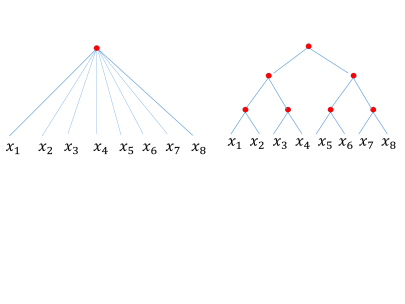


* $W_m^n$: class of $n$-variable functions with partial derivatives up to $m$-th order

* $W_m^{n,2}\subset W_m^n$: compositional subclass following binary tree structure 

**Theorem.** Let $\sigma: \mathbb{R} \rightarrow \mathbb{R}$ be infinitely differentiable, and not a polynomial. For $f \in W_m^n$ the complexity of shallow networks that provide accuracy at least $\epsilon$ is
$N=O\left(\epsilon^{-n / m}\right)$ and is the best possible.

**Theorem.** For $f \in W_m^{n, 2}$ consider a deep network with the same compositonal architecture and with an activation function $\sigma$ : $\mathbb{R} \rightarrow \mathbb{R}$ which is infinitely differentiable, and not a polynomial. The complexity of the network to provide approximation with accuracy at least $\epsilon$ is
\begin{equation}
N=O\left((n-1) \epsilon^{-2 / m}\right) .
\end{equation}

**Theorem.** Let $f$ be a L-Lipshitz continuous function of $n$ variables. Then, the complexity of a network which is a linear combination of ReLU providing an approximation with accuracy at least $\epsilon$ is
$$
N_s=O\left(\left(\frac{\epsilon}{L}\right)^{-n}\right)
$$
wheres that of a deep compositional architecture is
$$
N_d=O\left((n-1)\left(\frac{\epsilon}{L}\right)^{-2}\right) .
$$